Dropped low-variance features: ['relation_4.0', 'relation_5.0', 'ethnicity_Turkish', 'ethnicity_others', 'country_of_res_AmericanSamoa', 'country_of_res_Angola', 'country_of_res_Argentina', 'country_of_res_Armenia', 'country_of_res_Aruba', 'country_of_res_Azerbaijan', 'country_of_res_Bahamas', 'country_of_res_Bangladesh', 'country_of_res_Belgium', 'country_of_res_Bolivia', 'country_of_res_Burundi', 'country_of_res_China', 'country_of_res_Cyprus', 'country_of_res_Czech Republic', 'country_of_res_Egypt', 'country_of_res_Ethiopia', 'country_of_res_Germany', 'country_of_res_Hong Kong', 'country_of_res_Iceland', 'country_of_res_Iran', 'country_of_res_Iraq', 'country_of_res_Italy', 'country_of_res_Japan', 'country_of_res_Malaysia', 'country_of_res_Mexico', 'country_of_res_Nicaragua', 'country_of_res_Niger', 'country_of_res_Oman', 'country_of_res_Pakistan', 'country_of_res_Romania', 'country_of_res_Russia', 'country_of_res_Saudi Arabia', 'country_of_res_Serbia', 'country_of_res_Sierra Leone',

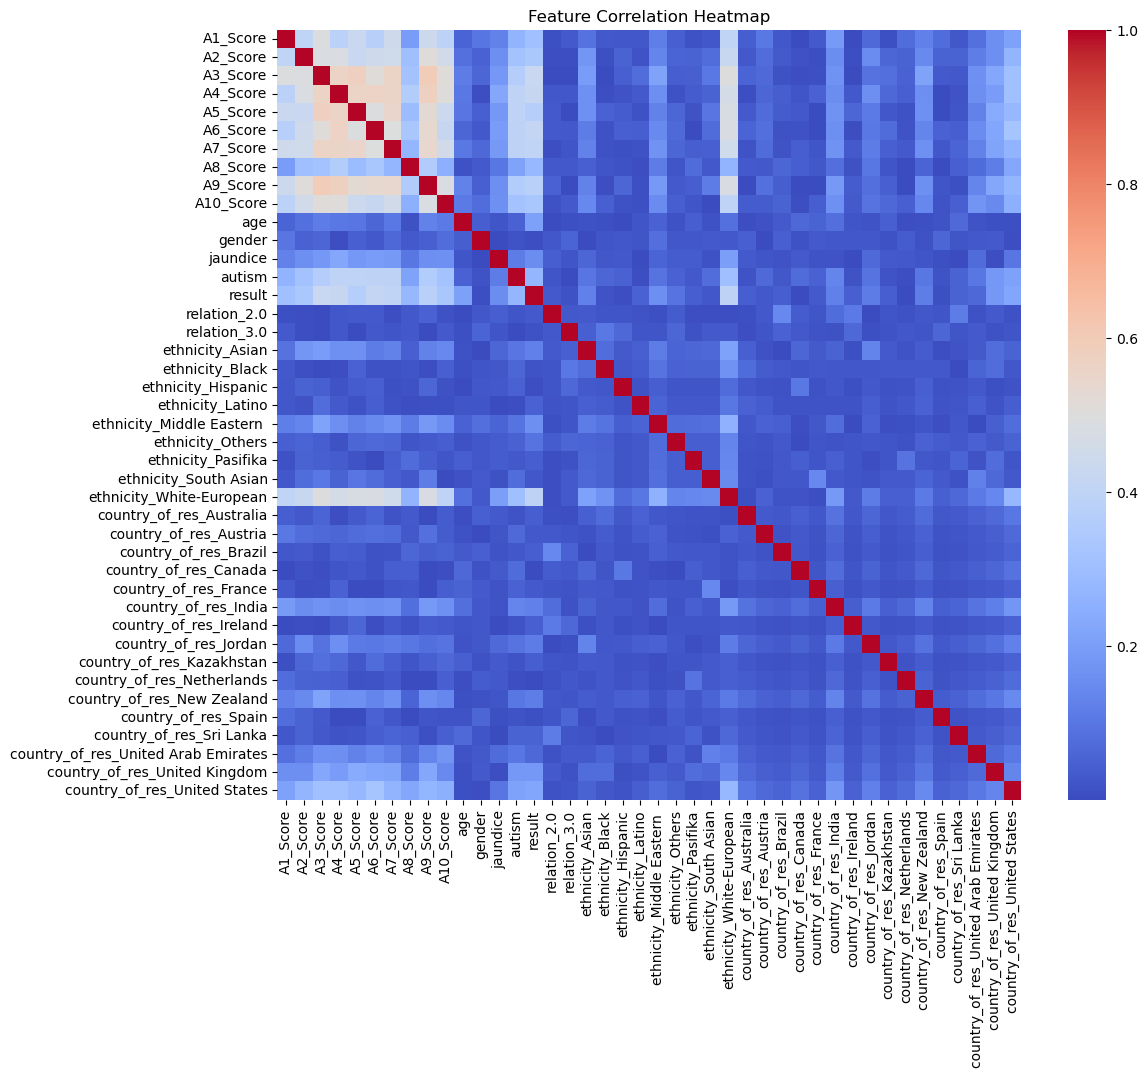

Highly correlated features to drop: []
                                Feature       Score
5                              A6_Score  333.690462
3                              A4_Score  267.487510
8                              A9_Score  218.159831
25             ethnicity_White-European  217.207738
4                              A5_Score  216.279628
2                              A3_Score  215.273204
6                              A7_Score  205.281116
1                              A2_Score  128.759286
13                               autism  118.227076
14                               result  112.790540
41         country_of_res_United States  112.078853
9                             A10_Score  106.920571
7                              A8_Score   86.295342
0                              A1_Score   79.197664
31                 country_of_res_India   24.016591
40        country_of_res_United Kingdom   21.884468
36           country_of_res_New Zealand   19.507431
12                       

<Figure size 1000x600 with 0 Axes>


Final Model Performance on Holdout Set:
ROC-AUC: 0.8800
PR-AUC: 0.6088
F1 Score: 0.6269
Matthews Correlation Coefficient: 0.5292
Mean ROC-AUC: 0.8789447762349586 (95% CI: 0.8587978578556381, 0.8990916946142791)
Mean PR-AUC: 0.4433733757782592 (95% CI: 0.39388980158421294, 0.49285694997230545)
Mean F1 Score: 0.5344895366119495 (95% CI: 0.5000673057978129, 0.5689117674260862)
Mean Matthews Correlation Coefficient: 0.4496235907627624 (95% CI: 0.4079931265148692, 0.49125405501065567)


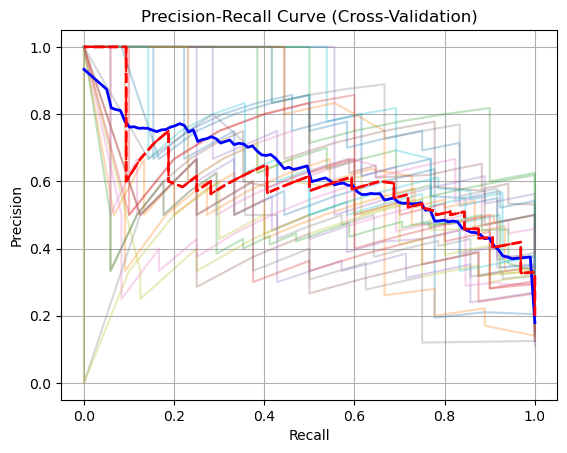

In [2]:
# Import necessary libraries
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score
from fairlearn.metrics import MetricFrame
from fairlearn.postprocessing import ThresholdOptimizer

# Run the Random Forest notebook to bring the model and data into scope
%run SupervisedRandomForest.ipynb

SHAP values matrix:
[[[-9.31742383e-03  9.31742383e-03]
  [-2.47156490e-02  2.47156490e-02]
  [-4.59062841e-02  4.59062841e-02]
  ...
  [-6.90885453e-05  6.90885453e-05]
  [-3.09594991e-03  3.09594991e-03]
  [ 1.60601245e-03 -1.60601245e-03]]

 [[-1.44207799e-02  1.44207799e-02]
  [-2.13686650e-02  2.13686650e-02]
  [-4.62521676e-02  4.62521676e-02]
  ...
  [-1.07877686e-04  1.07877686e-04]
  [-2.12213938e-03  2.12213938e-03]
  [ 5.77891434e-03 -5.77891434e-03]]

 [[-8.57476776e-03  8.57476776e-03]
  [-2.30250211e-02  2.30250211e-02]
  [-5.07826046e-02  5.07826046e-02]
  ...
  [-7.18086442e-05  7.18086442e-05]
  [-3.07231936e-03  3.07231936e-03]
  [ 4.84067369e-04 -4.84067369e-04]]

 ...

 [[-1.22443571e-02  1.22443571e-02]
  [-1.72462787e-02  1.72462787e-02]
  [-4.71463735e-02  4.71463735e-02]
  ...
  [-6.53353297e-05  6.53353297e-05]
  [-4.40434535e-03  4.40434535e-03]
  [ 4.11520199e-03 -4.11520199e-03]]

 [[-2.89356144e-02  2.89356144e-02]
  [-2.72043005e-02  2.72043005e-02]
  [-4.

<Figure size 640x480 with 0 Axes>

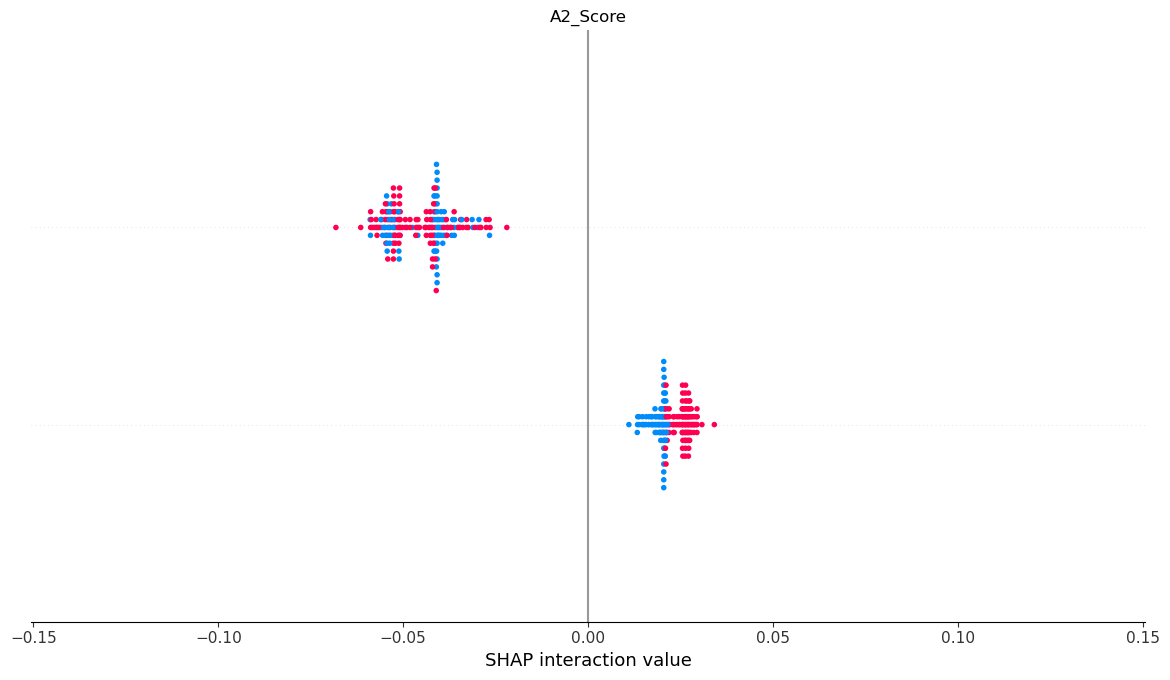

In [ ]:
# Calculate SHAP values
explainer = shap.TreeExplainer(rf_model)  # Assuming rf_model is the Random Forest model

# Ensure X_test is converted to the same format as used during training
if hasattr(rf_model, 'feature_names_in_'):
    X_test = pd.DataFrame(X_test, columns=rf_model.feature_names_in_)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)
# # Print SHAP values as a matrix
# print("SHAP values matrix:")
# print(shap_values)
# Handle cases where shap_values is a single array or a list
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use the positive class for binary classification

# Global SHAP summary plot
# shap.summary_plot(shap_values, X_test, plot_type="bar")

# Local SHAP explanation for a single instance
instance_index = 0  # Change this index to analyze different instances
shap.plots.force(
    explainer.expected_value[0], shap_values[0]
)